In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

xtrain = xtrain.reshape((60000, 28 * 28)).astype("float32") / 255
xtest = xtest.reshape((10000, 28 * 28)).astype("float32") / 255



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Supervised pretraining

In [3]:
xtrain_supervised, xtrain_unsupervised = xtrain[:30000], xtrain[30000:]
ytrain_supervised = ytrain[:30000]

In [4]:

from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([

    Dense(input_dim=784, units=64, activation='relu',), Dropout(0.3)
])

model.add(Dense(units = 32, activation='relu')), Dropout(0.2)
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)
history = model.fit(xtrain_supervised, ytrain_supervised, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])

test_loss, test_acc = model.evaluate(xtest, ytest)

print('Training accuracy:', history.history['accuracy'][-1])
print('Test accuracy: ', test_acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7015 - loss: 0.9410 - val_accuracy: 0.9200 - val_loss: 0.2602
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9107 - loss: 0.2994 - val_accuracy: 0.9375 - val_loss: 0.2014
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9335 - loss: 0.2262 - val_accuracy: 0.9478 - val_loss: 0.1701
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9409 - loss: 0.1998 - val_accuracy: 0.9498 - val_loss: 0.1608
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9432 - loss: 0.1775 - val_accuracy: 0.9538 - val_loss: 0.1536
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9494 - loss: 0.1542 - val_accuracy: 0.9558 - val_loss: 0.1461
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9535 - loss: 0.1473 - val_accuracy: 0.9560 - val_loss: 0.1490
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9604 - loss: 0.1303 - val_accuracy: 0.

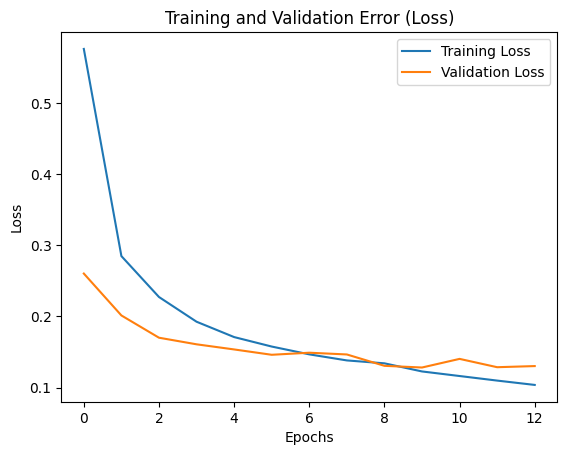

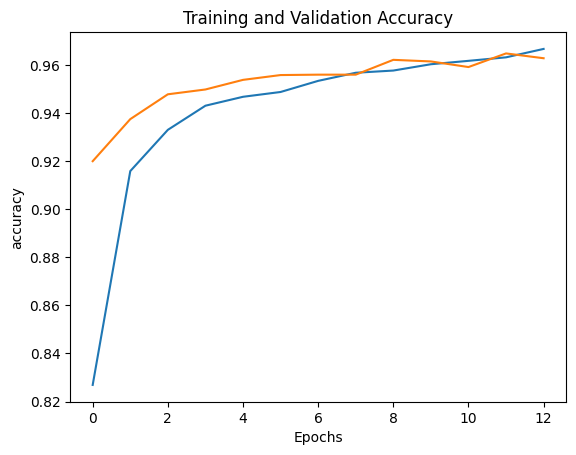

In [5]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Error (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

In [6]:
#Save weights

model.save_weights('supervised_pretrained.weights.h5')

## Unsupervised Pretraining

In [7]:
#Unsupervised Pretraining using autoencoders

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

input_dim = 784
encoding_dim = 64

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

history_unsupervised = autoencoder.fit(xtrain_unsupervised, xtrain_unsupervised, epochs=20, batch_size=256, validation_split=0.2)



Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1115 - val_loss: 0.0473
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0432 - val_loss: 0.0326
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0302 - val_loss: 0.0246
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0237 - val_loss: 0.0208
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203 - val_loss: 0.0182
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - val_loss: 0.0162
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - val_loss: 0.0148
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - val_loss: 0.0136
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0133 - val_loss: 0.0126
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0117
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_l

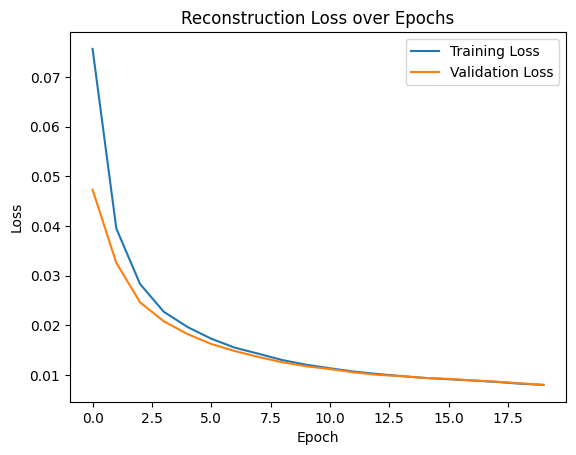

In [8]:
plt.plot(history_unsupervised.history['loss'], label='Training Loss')
plt.plot(history_unsupervised.history['val_loss'], label='Validation Loss')
plt.title('Reconstruction Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


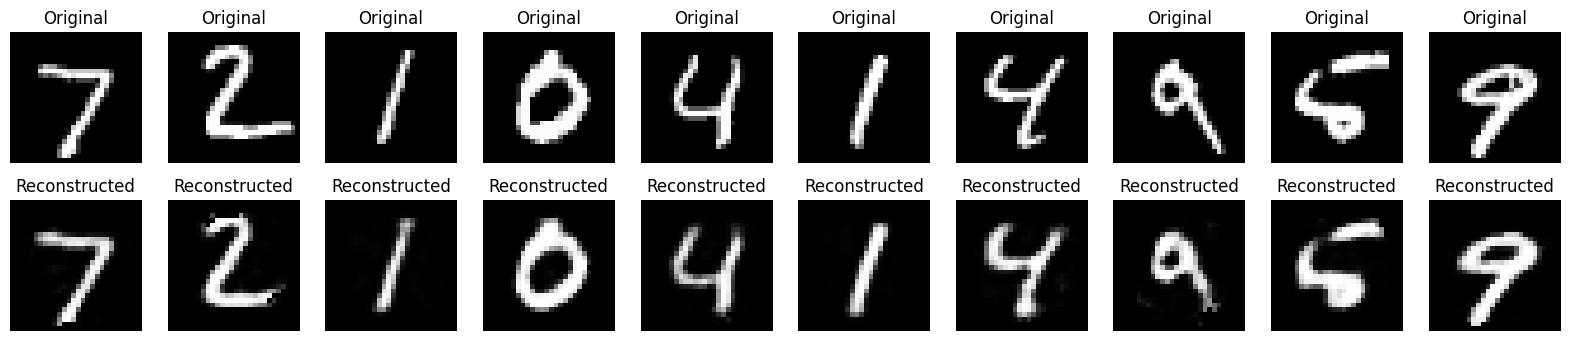

In [9]:
#Original vs Reconstruted Images

decoded_imgs = autoencoder.predict(xtest)

# Number of samples to display
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

In [10]:
autoencoder.save_weights("unsupervised_pretrained.weights.h5")

## Network Architecture

In [11]:
# Model initialized with pretrained weights

model_new = Sequential([
    Dense(256, activation='relu', input_dim=784),
    Dense(784, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Assign pretrained weights
model_new.layers[0].set_weights(autoencoder.layers[1].get_weights())
model_new.layers[2].set_weights(model.layers[0].get_weights())
model_new.layers[3].set_weights(model.layers[1].get_weights())

model_new.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

history_new = model_new.fit(xtrain_supervised, ytrain_supervised, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3807 - loss: 1.7725 - val_accuracy: 0.9227 - val_loss: 0.3149
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8914 - loss: 0.3958 - val_accuracy: 0.9510 - val_loss: 0.1909
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9462 - loss: 0.2097 - val_accuracy: 0.9515 - val_loss: 0.1990
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9623 - loss: 0.1510 - val_accuracy: 0.9582 - val_loss: 0.1806
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9702 - loss: 0.1143 - val_accuracy: 0.9638 - val_loss: 0.1667
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9748 - loss: 0.0919 - val_accuracy: 0.9557 - val_loss: 0.1882
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9810 - loss: 0.0746 - val_accuracy: 0.9622 - val_loss: 0.2142
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9816 - loss: 0.0671 - val_accuracy: 0.

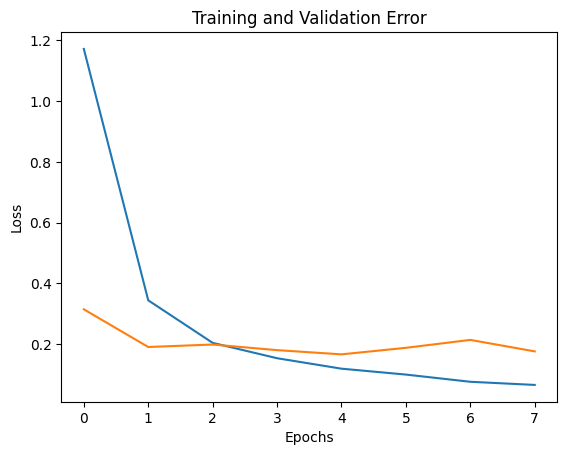

In [12]:
plt.plot(history_new.history['loss'], label = 'Training Loss')
plt.plot(history_new.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

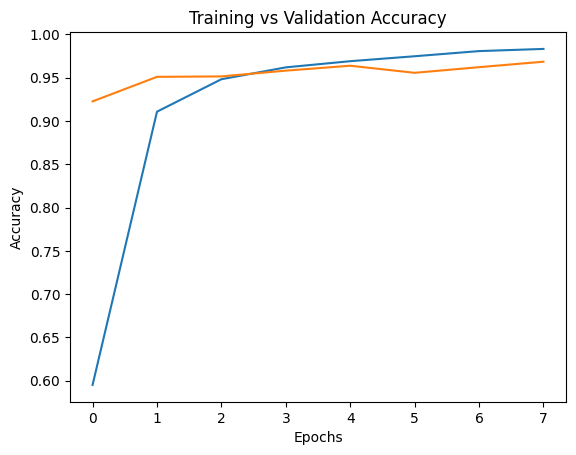

In [13]:
plt.plot(history_new.history['accuracy'], label = 'Training accuracy')
plt.plot(history_new.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [14]:
model_baseline = Sequential(
    [
        Dense(input_dim = 784, units= 32, activation='relu'),
        Dense(units=10, activation='softmax')
    ]
)

model_baseline.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)
history_baseline = model_baseline.fit(xtrain_supervised, ytrain_supervised, epochs=20, batch_size=32, validation_split=0.2
                                      , callbacks= [early_stop])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7654 - loss: 0.8274 - val_accuracy: 0.9115 - val_loss: 0.3114
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9243 - loss: 0.2712 - val_accuracy: 0.9248 - val_loss: 0.2642
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9409 - loss: 0.2116 - val_accuracy: 0.9343 - val_loss: 0.2251
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9511 - loss: 0.1781 - val_accuracy: 0.9415 - val_loss: 0.1980
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9570 - loss: 0.1550 - val_accuracy: 0.9440 - val_loss: 0.1865
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9653 - loss: 0.1270 - val_accuracy: 0.9457 - val_loss: 0.1744
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9691 - loss: 0.1104 - val_accuracy: 0.9453 - val_loss: 0.1824
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9705 - loss: 0.1020 - val_accuracy: 0.

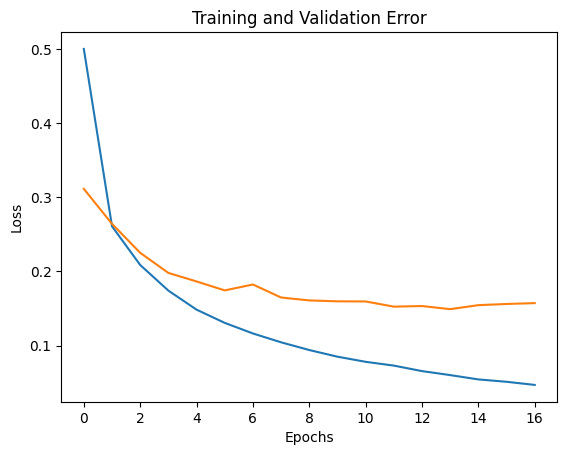

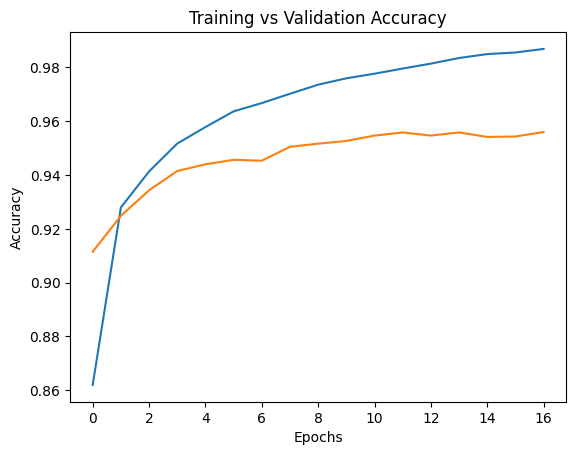

In [15]:
plt.plot(history_baseline.history['loss'], label = 'Training Loss')
plt.plot(history_baseline.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history_baseline.history['accuracy'], label = 'Training accuracy')
plt.plot(history_baseline.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Observation:

the model using pretrained weights converged in fewer epochs with less variation in training and validation accuracies and loss.


--- Testing combination 1/10 ---
Parameters: {'learning_rate': 0.001, 'dropout_rate_2': 0.2, 'dropout_rate_1': 0.4, 'batch_size': 128}
Validation Accuracy: 0.9764
*** New best model found! ***

--- Testing combination 2/10 ---
Parameters: {'learning_rate': 0.0001, 'dropout_rate_2': 0.2, 'dropout_rate_1': 0.2, 'batch_size': 16}
Validation Accuracy: 0.9761

--- Testing combination 3/10 ---
Parameters: {'learning_rate': 0.005, 'dropout_rate_2': 0.4, 'dropout_rate_1': 0.2, 'batch_size': 32}
Validation Accuracy: 0.9584

--- Testing combination 4/10 ---
Parameters: {'learning_rate': 0.0001, 'dropout_rate_2': 0.4, 'dropout_rate_1': 0.2, 'batch_size': 128}
Validation Accuracy: 0.9790
*** New best model found! ***

--- Testing combination 5/10 ---
Parameters: {'learning_rate': 0.0005, 'dropout_rate_2': 0.2, 'dropout_rate_1': 0.5, 'batch_size': 32}
Validation Accuracy: 0.9741

--- Testing combination 6/10 ---
Parameters: {'learning_rate': 0.0005, 'dropout_rate_2': 0.3, 'dropout_rate_1': 0.5, 'b

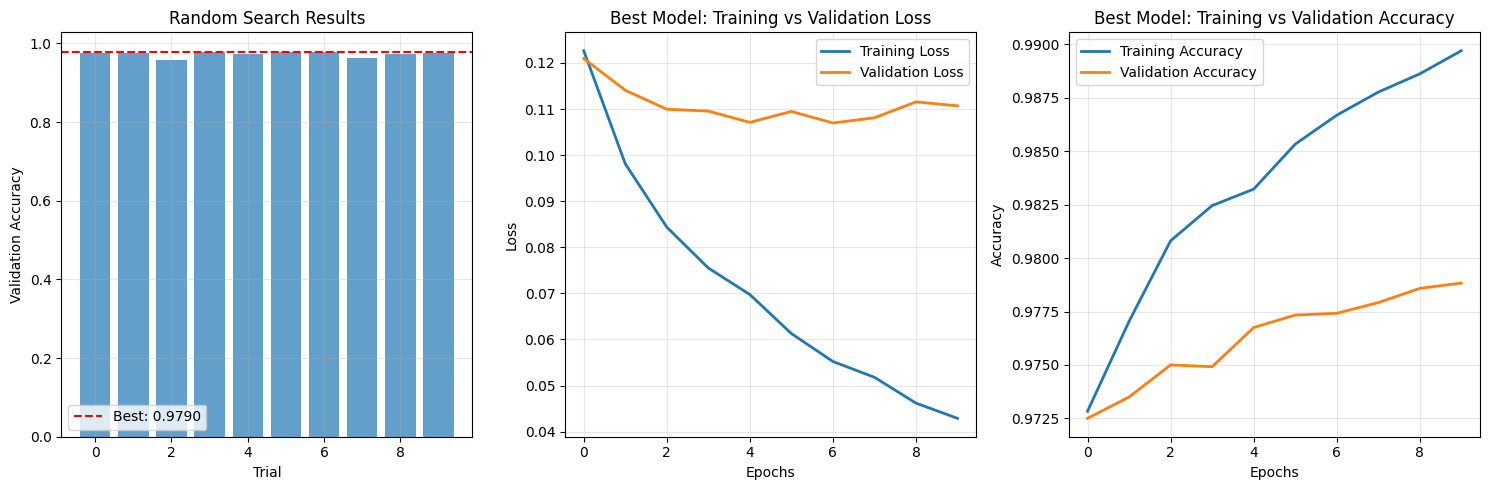


COMPARISON WITH ORIGINAL MODEL
Original Model Test Accuracy: 0.9655
Tuned Model Test Accuracy: 0.9790
Improvement: 0.0135


In [16]:
# Hyperparameter Tuning using Random Search by cloning model_new
from sklearn.model_selection import ParameterSampler
from tensorflow.keras.models import clone_model

np.random.seed(42)
tf.random.set_seed(42)

param_grid = {
    'learning_rate': [0.001, 0.0005, 0.0001, 0.005],
    'batch_size': [16, 32, 64, 128],
    'dropout_rate_1': [0.2, 0.3, 0.4, 0.5],
    'dropout_rate_2': [0.1, 0.2, 0.3, 0.4]
}

# Number of random combinations to try
n_iter = 10

param_combinations = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_val_accuracy = 0
best_params = None
best_model = None
best_history = None
history_dict = {}

for i, params in enumerate(param_combinations):
    print(f"\n--- Testing combination {i+1}/{n_iter} ---")
    print(f"Parameters: {params}")

    model_clone = clone_model(model_new)
    model_clone.set_weights(model_new.get_weights())

    model_clone.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=0
    )

    history = model_clone.fit(
        xtrain,
        ytrain,
        epochs=20,
        batch_size=params['batch_size'],
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=0
    )

    # Evaluate on validation set
    val_loss, val_accuracy = model_clone.evaluate(xtest, ytest, verbose=0)

    # Store results
    history_dict[i] = {
        'params': params,
        'history': history.history,
        'val_accuracy': val_accuracy,
        'val_loss': val_loss,
        'model': model_clone
    }

    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Update best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = params
        best_model = model_clone
        best_history = history.history
        print("*** New best model found! ***")

print(f"\nBest parameters found:")
for key, value in best_params.items():
    print(f"  {key}: {value}")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

# Evaluate on test set
test_loss, test_accuracy = best_model.evaluate(xtest, ytest, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot comparison of all trials
plt.figure(figsize=(15, 5))

# Plot 1: Validation accuracy comparison
plt.subplot(1, 3, 1)
accuracies = [history_dict[i]['val_accuracy'] for i in range(n_iter)]
plt.bar(range(n_iter), accuracies, alpha=0.7)
plt.axhline(y=best_val_accuracy, color='r', linestyle='--', label=f'Best: {best_val_accuracy:.4f}')
plt.xlabel('Trial')
plt.ylabel('Validation Accuracy')
plt.title('Random Search Results')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Training vs validation loss for best model
plt.subplot(1, 3, 2)
if best_history:
    plt.plot(best_history['loss'], label='Training Loss', linewidth=2)
    plt.plot(best_history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title('Best Model: Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Plot 3: Training vs validation accuracy for best model
plt.subplot(1, 3, 3)
if best_history:
    plt.plot(best_history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(best_history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title('Best Model: Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare with original model
print(f"\n{'='*50}")
print("COMPARISON WITH ORIGINAL MODEL")
print(f"{'='*50}")
original_test_loss, original_test_accuracy = model_new.evaluate(xtest, ytest, verbose=0)
print(f"Original Model Test Accuracy: {original_test_accuracy:.4f}")
print(f"Tuned Model Test Accuracy: {test_accuracy:.4f}")
print(f"Improvement: {test_accuracy - original_test_accuracy:.4f}")

## Final Results:

My initial and current results show very little overfitting with maximum generalization but not so good after performing hyperparameter tuning as due to random search some of the combinations were introducing overfitting and taking too long to train even with random search.

Supervised and Unsupervised training is much better than just training a model from scratch.